In [2]:
import numpy as np

# dataset
data = np.genfromtxt("advertising.csv", delimiter=",", skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]


# Normalize input data by using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg


X_b, maxi, mini, avg = mean_normalization(X)

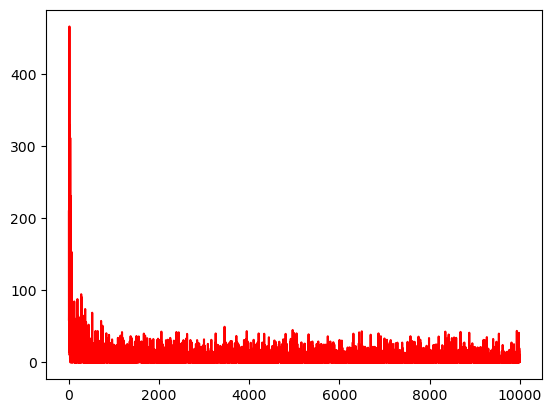

In [18]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # Random initialization of theta
    thetas = np.random.randn(4, 1)  # uncomment this line for real application
    # thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])  # Used for example
    thetas_path = [thetas]
    losses = []

    N = len(X_b)  # Number of samples

    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            random_index = np.random.randint(N)  # Use this line in real applications

            xi = X_b[random_index : random_index + 1]
            yi = y[random_index : random_index + 1]

            # Compute output (prediction)
            prediction = np.dot(xi, thetas)

            # Compute loss (MSE)
            loss = np.square(prediction - yi).mean()
            losses.append(loss)  # Logging the loss for analysis

            # Compute gradient for loss
            gradients = 2 * xi.T.dot(prediction - yi)

            # Update theta
            thetas = thetas - learning_rate * gradients

            # Logging theta path
            thetas_path.append(thetas)

    return thetas_path, losses




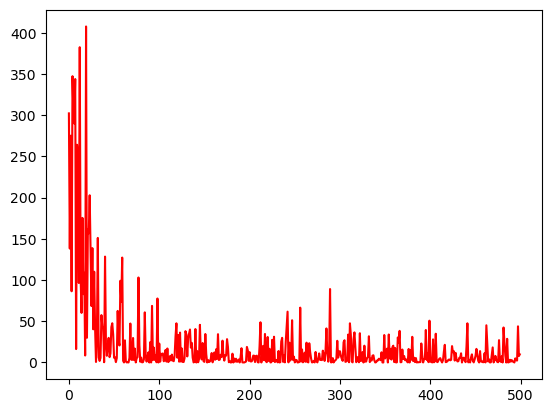

In [20]:
import matplotlib.pyplot as plt

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [21]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

7906.156891246243
